Exploring the Seaborn taxi database.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pingouin as pg

In [2]:
taxis = sns.load_dataset("taxis")

# taxis.head()

In [5]:
taxis.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


It's interesting that the median fares and distances seem low.

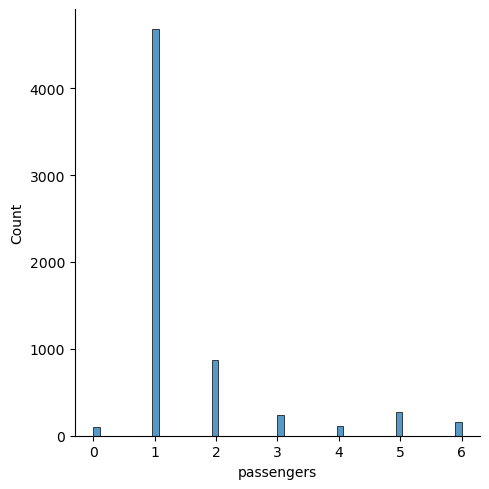

In [6]:
sns.displot(x='passengers',data=taxis)

In [7]:
from scipy.stats import normaltest

In [8]:
normaltest(taxis['passengers'])

NormaltestResult(statistic=np.float64(2979.2056970019553), pvalue=np.float64(0.0))

The number of passengers aren't normally distributed.

In [9]:
from scipy.stats import skew,kurtosis

In [10]:
skew(taxis['passengers'])

np.float64(2.358593335496685)

In [11]:
kurtosis(taxis['passengers'])

np.float64(4.881341106667947)

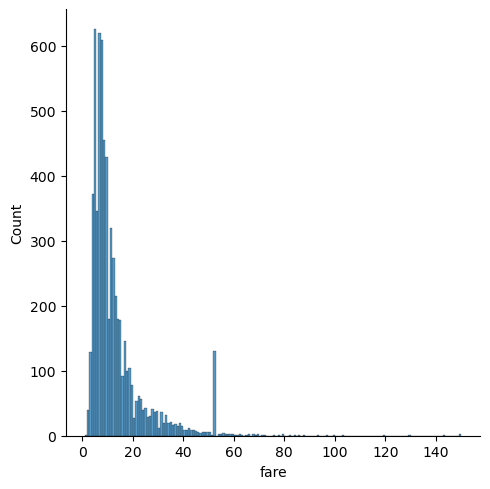

In [12]:
sns.displot(x='fare',data=taxis)

In [13]:
normaltest(taxis['fare'])

NormaltestResult(statistic=np.float64(4602.396850202748), pvalue=np.float64(0.0))

In [14]:
skew(taxis['fare'])

np.float64(3.2167125215128665)

In [15]:
kurtosis(taxis['fare'])

np.float64(17.648717642103172)

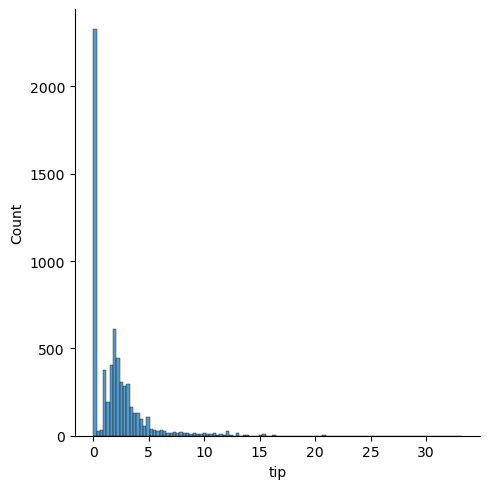

In [16]:
sns.displot(x='tip',data=taxis)

That is obviously not normally distributed. Passengers must be pretty stingy!

In [17]:
normaltest(taxis['tip'])

NormaltestResult(statistic=np.float64(3871.5147093134533), pvalue=np.float64(0.0))

In [18]:
skew(taxis['tip'])

np.float64(2.664530082546892)

In [19]:
kurtosis(taxis['tip'])

np.float64(12.739608436448918)

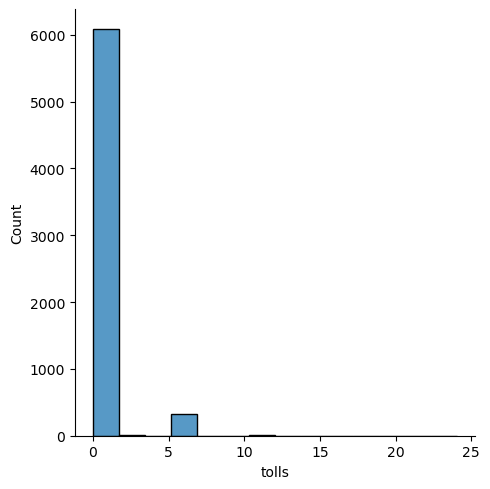

In [21]:
sns.displot(x='tolls',data=taxis)

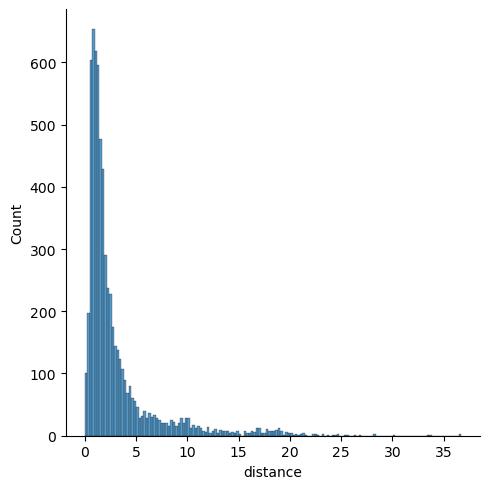

In [22]:
sns.displot(x='distance',data=taxis)

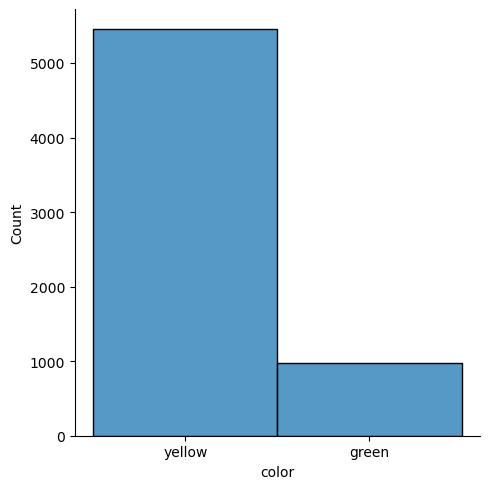

In [20]:
sns.displot(x='color',data=taxis)

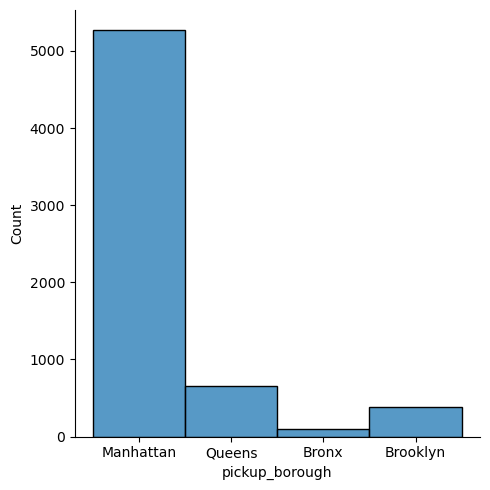

In [26]:
sns.displot(x='pickup_borough',data=taxis)

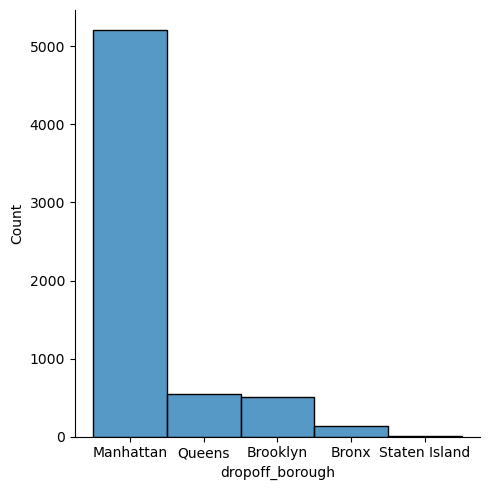

In [27]:
sns.displot(x='dropoff_borough',data=taxis)

It seems the vast majority of trips are in Manhattan.

In [29]:
pd.crosstab(taxis['pickup_borough'],taxis['dropoff_borough'])

dropoff_borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
pickup_borough,,,,,
Bronx,66,4,25,4,0
Brooklyn,5,282,67,26,0
Manhattan,55,153,4885,163,2
Queens,11,62,224,349,0


In [30]:
pg.chi2_independence(taxis,'dropoff_borough','pickup_borough')

/home/ddelony/miniforge3/envs/stats/lib/python3.13/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/home/ddelony/miniforge3/envs/stats/lib/python3.13/site-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/home/ddelony/miniforge3/envs/stats/lib/python3.13/site-packages/scipy/stats/_stats_py.py:7344: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/home/ddelony/miniforge3/envs/stats/lib/python3.13/site-packages/scipy/stats/_stats_py.py:7344: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/home/ddelony/miniforge3/envs/stats/lib/python3.13/site-packages/scipy/stats/_stats_py.py:7341: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


(pickup_borough       Bronx    Brooklyn    Manhattan      Queens
 dropoff_borough                                                
 Bronx             2.124863    8.156039   112.853830   13.865267
 Brooklyn          7.770484   29.826101   412.699044   50.704371
 Manhattan        80.667241  309.631835  4284.326806  526.374119
 Queens            8.406392   32.266959   446.472818   54.853830
 Staten Island     0.031020    0.119066     1.647501    0.202413,
 pickup_borough   Bronx  Brooklyn  Manhattan  Queens
 dropoff_borough                                    
 Bronx               66         5         55      11
 Brooklyn             4       282        153      62
 Manhattan           25        67       4885     224
 Queens               4        26        163     349
 Staten Island        0         0          2       0,
                  test    lambda         chi2   dof  pval    cramer  power
 0             pearson  1.000000  6499.172939  12.0   0.0  0.580312    1.0
 1        cressie-read

There's a warning about low observations, but then again, I probably didn't need a chi-square to show that the pickups and drop-offs were lopsided in favor of Manhattan anyway.

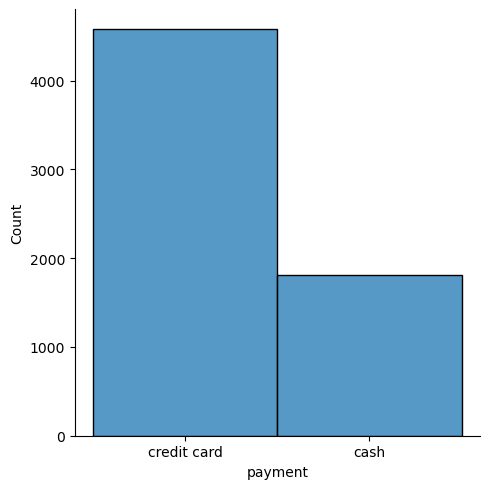

In [72]:
sns.displot(x='payment',data=taxis)

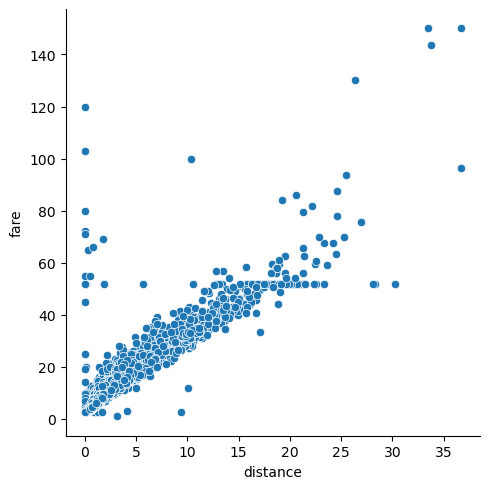

In [31]:
sns.relplot(x='distance',y='fare',data=taxis)

<Axes: xlabel='distance', ylabel='fare'>

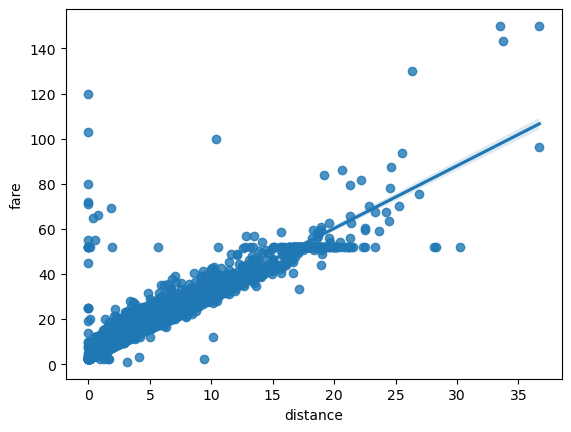

In [36]:
sns.regplot(x='distance',y='fare',data=taxis)

In [35]:
model = pg.linear_regression(taxis['distance'],taxis['fare'])
model.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,4.69,0.07,65.26,0.0,0.85,0.85,4.55,4.83
1,distance,2.78,0.01,188.39,0.0,0.85,0.85,2.75,2.81


Again, probably not that surprising that distance is correlated with fare. Let's try with more regressors.

In [37]:
model = pg.linear_regression(taxis[['distance','tip','passengers']],taxis['fare'])
model.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,4.26,0.10,41.38,0.00,0.85,0.85,4.06,4.46
1,distance,2.65,0.02,164.01,0.00,0.85,0.85,2.62,2.68
2,tip,0.43,0.03,16.94,0.00,0.85,0.85,0.38,0.48
3,passengers,-0.02,0.05,-0.53,0.59,0.85,0.85,-0.11,0.07


No change. Still a pretty good correlation. Distance seems to be the most significant predictor.

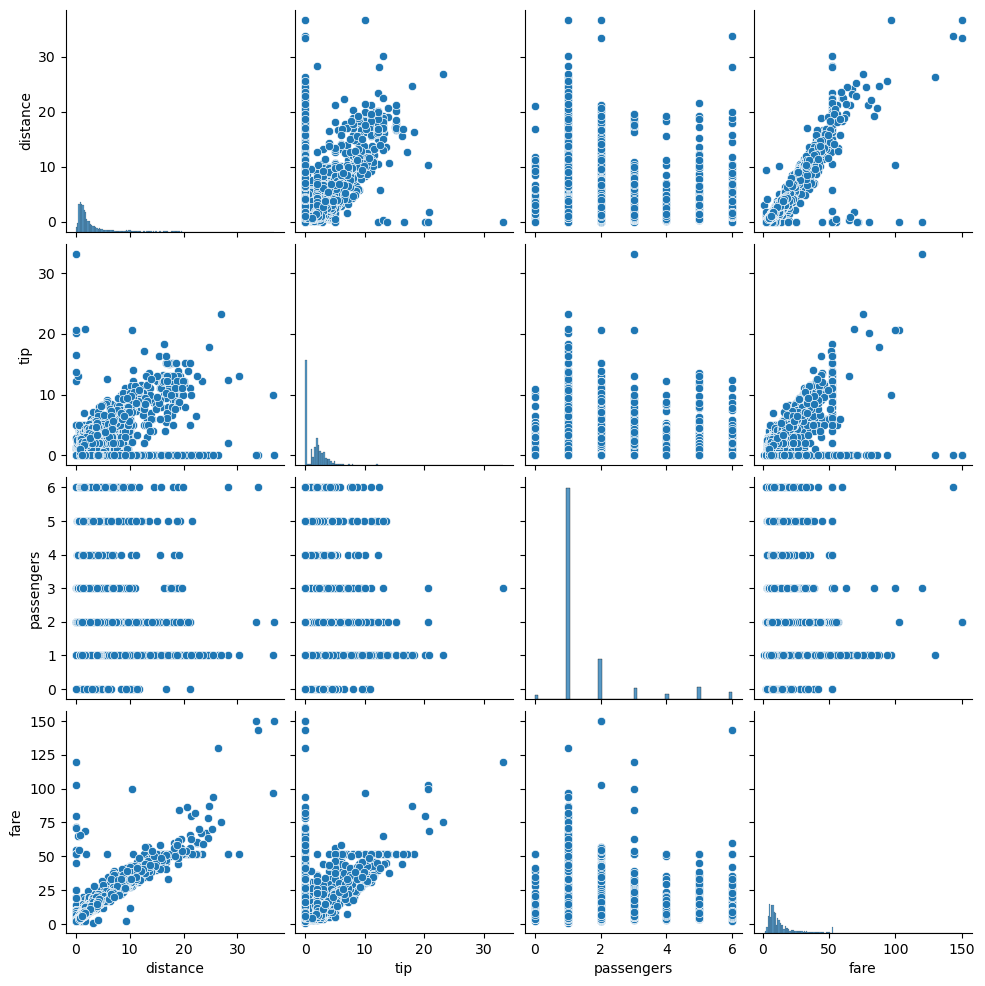

In [40]:
sns.pairplot(taxis[['distance','tip','passengers','fare']])

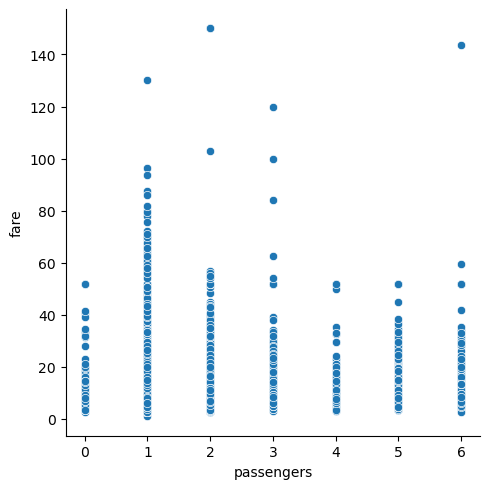

In [41]:
sns.relplot(x='passengers',y='fare',data=taxis)

<Axes: xlabel='passengers', ylabel='fare'>

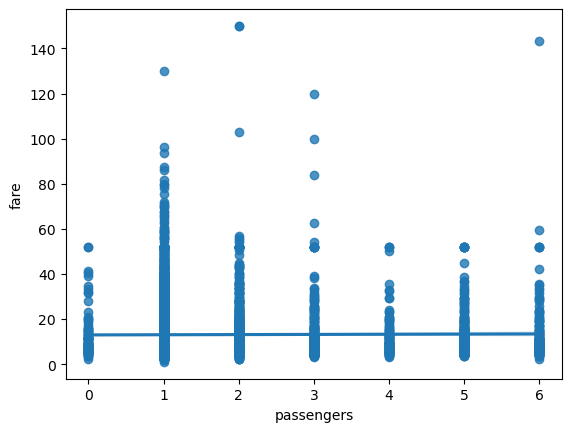

In [42]:
sns.regplot(x='passengers',y='fare',data=taxis)

Straight line, so likely number of passengers is not a significant predictor of fare, as seen in the earlier multiple regression.

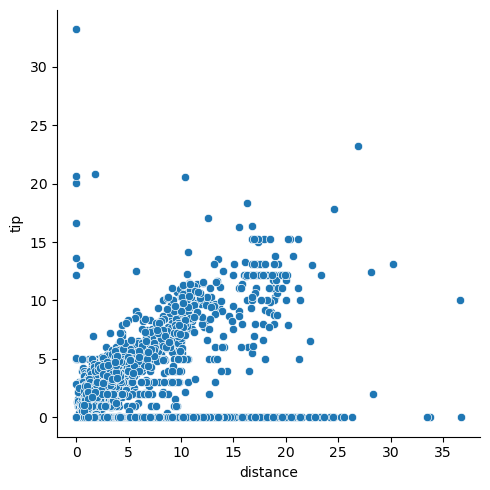

In [43]:
sns.relplot(x='distance',y='tip',data=taxis)

<Axes: xlabel='distance', ylabel='tip'>

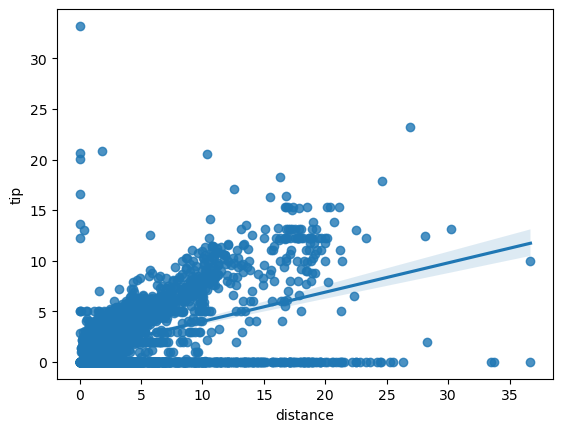

In [44]:
sns.regplot(x='distance',y='tip',data=taxis)

In [47]:
model = pg.linear_regression(taxis['distance'],taxis['tip'])
model.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.10,0.03,31.8,0.0,0.2,0.2,1.04,1.17
1,distance,0.29,0.01,40.7,0.0,0.2,0.2,0.28,0.30


Distance is a much smaller correlation with tip, but still significant (T=40.7,p=0.0)

In [77]:
model = pg.linear_regression(taxis[['distance','fare','passengers','tolls']],taxis['tip'])
model.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.74,0.06,13.22,0.00,0.26,0.26,0.63,0.85
1,distance,-0.05,0.02,-2.65,0.01,0.26,0.26,-0.08,-0.01
2,fare,0.09,0.01,16.00,0.00,0.26,0.26,0.08,0.10
3,passengers,0.04,0.02,1.77,0.08,0.26,0.26,-0.00,0.08
4,tolls,0.33,0.02,13.89,0.00,0.26,0.26,0.29,0.38


Again, low correlation but still signifigcant predictors, with fare appearing to be the most significant predictor.

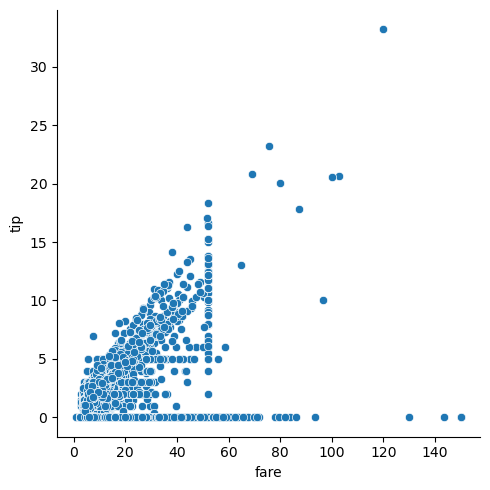

In [55]:
sns.relplot(x='fare',y='tip',data=taxis)

<Axes: xlabel='fare', ylabel='tip'>

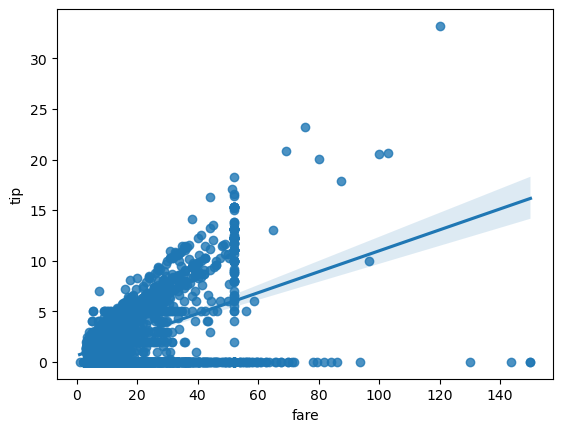

In [54]:
sns.regplot(x='fare',y='tip',data=taxis)

In [53]:
model = pg.linear_regression(taxis['fare'],taxis['tip'])
model.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.62,0.04,15.48,0.0,0.24,0.24,0.54,0.70
1,fare,0.10,0.00,44.91,0.0,0.24,0.24,0.10,0.11


Yet again, low correlation but significant predictor anyway.

Since the data seems so skewed, non-parametric ANOVA seems appropriate.

In [56]:
pg.kruskal(data=taxis,dv='fare',between='pickup_borough')

,Source,ddof1,H,p-unc
Kruskal,pickup_borough,3,437.481031,1.681165e-94


In [57]:
pg.kruskal(data=taxis,dv='fare',between='dropoff_borough')

,Source,ddof1,H,p-unc
Kruskal,dropoff_borough,4,440.519031,4.868664e-94


In [58]:
pg.kruskal(data=taxis,dv='fare',between='pickup_zone')

,Source,ddof1,H,p-unc
Kruskal,pickup_zone,193,1210.959922,6.362692e-147


In [59]:
pg.kruskal(data=taxis,dv='fare',between='dropoff_zone')

,Source,ddof1,H,p-unc
Kruskal,dropoff_zone,202,1017.948473,5.618441e-109


Pickup and dropoff locations seem like a significant predictor of fares.

In [60]:
pg.kruskal(data=taxis,dv='passengers',between='pickup_borough')

,Source,ddof1,H,p-unc
Kruskal,pickup_borough,3,35.954534,7.655972e-08


In [61]:
pg.kruskal(data=taxis,dv='passengers',between='dropoff_borough')

,Source,ddof1,H,p-unc
Kruskal,dropoff_borough,4,27.63007,0.000015


In [62]:
pg.kruskal(data=taxis,dv='passengers',between='pickup_zone')

,Source,ddof1,H,p-unc
Kruskal,pickup_zone,193,228.134744,0.0424


In [63]:
pg.kruskal(data=taxis,dv='passengers',between='dropoff_zone')

,Source,ddof1,H,p-unc
Kruskal,dropoff_zone,202,202.598214,0.474923


Borough and pickup zone are significant predictors of passengers, but not dropoff zone.

In [64]:
pd.crosstab(taxis['pickup_zone'],taxis['dropoff_zone'])

dropoff_zone,Allerton/Pelham Gardens,Alphabet City,Astoria,Auburndale,Baisley Park,Bath Beach,Battery Park,Battery Park City,Bay Ridge,Bayside,...,Williamsbridge/Olinville,Williamsburg (North Side),Williamsburg (South Side),Windsor Terrace,Woodhaven,Woodlawn/Wakefield,Woodside,World Trade Center,Yorkville East,Yorkville West
pickup_zone,,,,,,,,,,,,,,,,,,,,,
Allerton/Pelham Gardens,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alphabet City,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Astoria,0,0,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,0,0,0
Auburndale,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Battery Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodlawn/Wakefield,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Woodside,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
World Trade Center,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
pg.kruskal(data=taxis,dv='fare',between='payment')

,Source,ddof1,H,p-unc
Kruskal,payment,1,73.081432,1.244095e-17


In [66]:
pg.kruskal(data=taxis,dv='tip',between='payment')

,Source,ddof1,H,p-unc
Kruskal,payment,1,3306.29995,0.0


Payment method is a significant predictor of fare as well as tip.

In [68]:
pd.crosstab(taxis['payment'],taxis['pickup_borough'])

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
payment,,,,
cash,25,119,1397,266
credit card,74,261,3839,383


In [70]:
pg.chi2_independence(data=taxis,x='payment',y='pickup_borough')

(pickup_borough      Bronx    Brooklyn    Manhattan      Queens
 payment                                                       
 cash            28.110151  107.897549  1486.714645  184.277656
 credit card     70.889849  272.102451  3749.285355  464.722344,
 pickup_borough  Bronx  Brooklyn  Manhattan  Queens
 payment                                           
 cash               25       119       1397     266
 credit card        74       261       3839     383,
                  test    lambda       chi2  dof          pval    cramer  \
 0             pearson  1.000000  60.249256  3.0  5.199878e-13  0.096776   
 1        cressie-read  0.666667  59.006732  3.0  9.581273e-13  0.095773   
 2      log-likelihood  0.000000  56.836070  3.0  2.785513e-12  0.093995   
 3       freeman-tukey -0.500000  55.458453  3.0  5.481548e-12  0.092849   
 4  mod-log-likelihood -1.000000  54.274909  3.0  9.803571e-12  0.091853   
 5              neyman -2.000000  52.428492  3.0  2.427057e-11  0.090277   
 


Pickup borough is a significant predictor of payment method. Could be Manhattan residents are wealthier and have more access to credit.

In [71]:
pg.kruskal(data=taxis,dv='tip',between='payment')

,Source,ddof1,H,p-unc
Kruskal,payment,1,3306.29995,0.0


Payment method is also a significant predictor of tip.

In [73]:
pg.kruskal(data=taxis,dv='tolls',between='pickup_borough')

,Source,ddof1,H,p-unc
Kruskal,pickup_borough,3,796.06416,3.089034e-172


In [74]:
pg.kruskal(data=taxis,dv='tolls',between='dropoff_borough')

,Source,ddof1,H,p-unc
Kruskal,dropoff_borough,4,302.319354,3.423623e-64


In [75]:
pg.kruskal(data=taxis,dv='tolls',between='pickup_zone')

,Source,ddof1,H,p-unc
Kruskal,pickup_zone,193,2017.154478,7.467547e-301


In [4]:
pg.kruskal(data=taxis,dv='tolls',between='dropoff_zone')

,Source,ddof1,H,p-unc
Kruskal,dropoff_zone,202,1339.966066,5.451442e-167


Pickup and drop-off locations seem to be significant predictor of tolls, but then again not a big surprise.

Let's create a column for travel time.

In [11]:
taxis['time'] = taxis['dropoff'] - taxis['pickup']

In [6]:
taxis['time'].head()

0   0 days 00:06:15
1   0 days 00:07:05
2   0 days 00:07:24
3   0 days 00:25:52
4   0 days 00:09:32
Name: time, dtype: timedelta64[ns]

In [7]:
taxis['time'].describe()

count                         6433
mean     0 days 00:14:20.976993626
std      0 days 00:11:38.633516153
min                0 days 00:00:00
25%                0 days 00:06:30
50%                0 days 00:10:54
75%                0 days 00:18:31
max                0 days 01:47:40
Name: time, dtype: object

Mean time divided by distance 60 (mph)

In [7]:
3 / 14 * 60

12.857142857142856

Median mph

In [10]:
1.64 / 10 * 60

9.839999999999998

So low mean and median speeds.

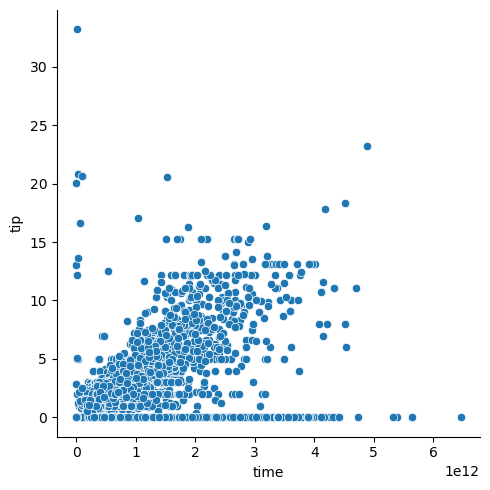

In [12]:
sns.relplot(x='time',y='tip',data=taxis)

Seems to be at least some correlation between time and tip.

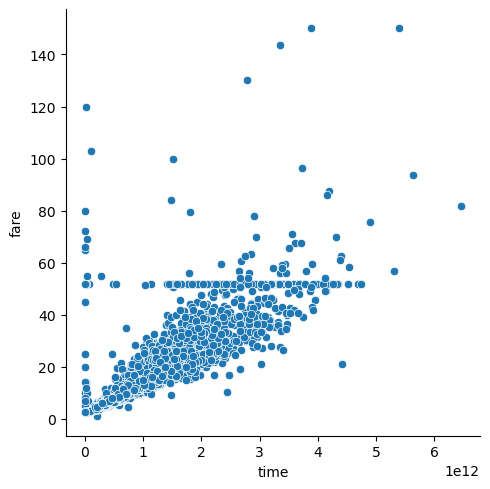

In [15]:
sns.relplot(x='time',y='fare',data=taxis)

Probably not surprising that longer times mean higher fares in a taxi. The meter's running, after all.